# Домашнее задание по теме "Работа с переменными"

In [1]:
# Подключим необходимые библиотеки

from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

Загрузим данные

In [2]:
boston = load_boston()
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
y = pd.DataFrame(boston['target'], columns=['MEDV'])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Добавим функции для оценки линейной модели и созданию one hoe encoding

In [6]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)

def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

Получим первоначальную оценку работы модели на начальных данных без из преобразования

In [7]:
get_score(data, y)

0.7112260057484974

Посмотрим, нет ли явно выраженной коррекляции значения, которое нам нужно предсказать, с параметрами

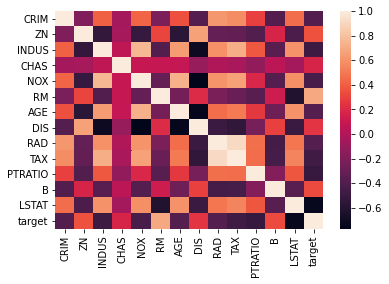

In [8]:
import seaborn as sns

data_total = data
data_total['target'] = y
sns.heatmap(data_total.corr())
data = data.drop(['target'], axis=1)

Корреляции нет

Посмотрим на статистические характеристики параметров

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Параметры ZN, INDUS, AGE, TAX, PTRATIO, B, LSTAT имеет смысл нормализовать

In [91]:
columns = ['ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

for col in columns:
    data[col] -= data[col].mean()
    data[col] /= data[col].std()


In [92]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,3.613524,-4.965286e-16,-4.444732e-16,0.069170,-1.106383e-15,6.266798,6.768850e-17,3.795043,-1.715799e-16,2.066858e-16,-1.477079e-15,1.089379e-15,1.097058e-18
std,8.601545,1.000000e+00,1.000000e+00,0.253994,1.000000e+00,0.729821,1.000000e+00,2.105710,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.006320,-4.872402e-01,-1.556302e+00,0.000000,-1.464433e+00,4.000000,-2.333128e+00,1.129600,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,0.082045,-4.872402e-01,-8.668328e-01,0.000000,-9.121262e-01,6.000000,-8.366200e-01,2.100175,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,0.256510,-4.872402e-01,-2.108898e-01,0.000000,-1.440749e-01,6.000000,3.170678e-01,3.207450,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,3.677083,4.872402e-02,1.014995e+00,0.000000,5.980871e-01,7.000000,9.059016e-01,5.188425,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,88.976200,3.800473e+00,2.420170e+00,1.000000,2.729645e+00,9.000000,1.116390e+00,12.126500,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


Проверим нет ли пропусков

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


Пропусков нет

Проверим насколько изменилось качество модели после нормализации параметров

In [94]:
get_score(data, y)

0.7248493104687767

Качество увеличилось на 0.136 - существенно

Количество комнат имеет смысл округлить - не бывают квартиры с дробным количество комнат

In [97]:
data['RM'] = data['RM'].apply(lambda x: round(x))
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0.284548,-1.286636,0.0,-0.144075,7,-0.119895,4.0900,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,0.02731,-0.487240,-0.592794,0.0,-0.739530,6,0.366803,4.9671,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,0.02729,-0.487240,-0.592794,0.0,-0.739530,7,-0.265549,4.9671,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,0.03237,-0.487240,-1.305586,0.0,-0.834458,7,-0.809088,6.0622,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,0.06905,-0.487240,-1.305586,0.0,-0.834458,7,-0.510674,6.0622,-0.752178,-1.105022,0.112920,0.440616,-1.025487


Проверим качество модели

In [98]:
get_score(data, y)

0.7248493104687767

Качество не изменилось. Поработаем дальше. Параметр B (это некий параметр, который показывает процент чернокожего населения) - возможно не так важен и является излишним

In [106]:
data_processed = data

In [107]:
data_processed = data_processed.drop(['B'], axis=1)
get_score(data_processed, y)

0.7295282945332331

Качество улучшилось. Посмотрим, получится ли сделать еще лучше. Попробуем кластеризовать по параметрам INDUS и NOX - степень загрязнения воздуха и доля промышленных территорий.

In [108]:
from sklearn.cluster import KMeans

In [109]:
kmeans = KMeans(n_clusters=5) # Попробуем разбить на 5 кластеров
cluster = kmeans.fit_predict(data_processed[['INDUS', 'NOX']])
data_processed['cluster'] = cluster
# data_processed = data_processed.drop(['INDUS', 'NOX'], axis=1)
data_processed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,cluster
0,0.00632,0.284548,-1.286636,0.0,-0.144075,7,-0.119895,4.0900,-0.981871,-0.665949,-1.457558,-1.074499,3
1,0.02731,-0.487240,-0.592794,0.0,-0.739530,6,0.366803,4.9671,-0.867024,-0.986353,-0.302794,-0.491953,3
2,0.02729,-0.487240,-0.592794,0.0,-0.739530,7,-0.265549,4.9671,-0.867024,-0.986353,-0.302794,-1.207532,3
3,0.03237,-0.487240,-1.305586,0.0,-0.834458,7,-0.809088,6.0622,-0.752178,-1.105022,0.112920,-1.360171,3
4,0.06905,-0.487240,-1.305586,0.0,-0.834458,7,-0.510674,6.0622,-0.752178,-1.105022,0.112920,-1.025487,3


In [110]:
get_score(data_processed, y)

0.7395600116871568

Качество стало еще выше. Улучшаем дальше. Посмотрим нет ли дисбаланса в параметре CHAS - наличие реки поблизости 

In [111]:
len(data_processed.loc[data_processed['CHAS'] == 0])

471

Дисбаланс есть, почти вся недвижимость находится не у реки. Тогда убучать на этом параметре несовсем верно. Уберем его и проверим качество

In [112]:
data_processed = data_processed.drop(['CHAS'], axis=1)
get_score(data_processed, y)

0.7417321356092323

Качество выросло. Улучшаем дальше. Попробуем кластеризовать и добавить группы со степенью удаленности от центра и шоссе

In [113]:
kmeans = KMeans(n_clusters=6) # Разобьем на 6 кластеров
cluster = kmeans.fit_predict(data_processed[['DIS', 'RAD']])
data_processed['cluster_dis'] = cluster
# data_processed = data_processed.drop(['DIS', 'RAD'], axis=1)
data_processed.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,cluster,cluster_dis
0,0.00632,0.284548,-1.286636,-0.144075,7,-0.119895,4.0900,-0.981871,-0.665949,-1.457558,-1.074499,3,1
1,0.02731,-0.487240,-0.592794,-0.739530,6,0.366803,4.9671,-0.867024,-0.986353,-0.302794,-0.491953,3,4
2,0.02729,-0.487240,-0.592794,-0.739530,7,-0.265549,4.9671,-0.867024,-0.986353,-0.302794,-1.207532,3,4
3,0.03237,-0.487240,-1.305586,-0.834458,7,-0.809088,6.0622,-0.752178,-1.105022,0.112920,-1.360171,3,4
4,0.06905,-0.487240,-1.305586,-0.834458,7,-0.510674,6.0622,-0.752178,-1.105022,0.112920,-1.025487,3,4


In [114]:
get_score(data_processed, y)

0.7458041809874092

Качетсво выросло. Попробуем улучшить еще. Добавим кластеризацию по степени криминальности района и проценту бедного населения. По сути эти кластеры отвечают за благополучие района

In [115]:
kmeans = KMeans(n_clusters=4) # Разделим на 4 кластера
cluster = kmeans.fit_predict(data_processed[['CRIM', 'LSTAT']])
data_processed['cluster_lstat'] = cluster
# data_processed = data_processed.drop(['DIS', 'RAD'], axis=1)
data_processed.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,cluster,cluster_dis,cluster_lstat
0,0.00632,0.284548,-1.286636,-0.144075,7,-0.119895,4.0900,-0.981871,-0.665949,-1.457558,-1.074499,3,1,1
1,0.02731,-0.487240,-0.592794,-0.739530,6,0.366803,4.9671,-0.867024,-0.986353,-0.302794,-0.491953,3,4,1
2,0.02729,-0.487240,-0.592794,-0.739530,7,-0.265549,4.9671,-0.867024,-0.986353,-0.302794,-1.207532,3,4,1
3,0.03237,-0.487240,-1.305586,-0.834458,7,-0.809088,6.0622,-0.752178,-1.105022,0.112920,-1.360171,3,4,1
4,0.06905,-0.487240,-1.305586,-0.834458,7,-0.510674,6.0622,-0.752178,-1.105022,0.112920,-1.025487,3,4,1


In [116]:
get_score(data_processed, y)

0.7481924468652033

Качество продолжает расти. Попробуем улучшить еще. На тепловой карте данных можно заметить что параметры RAD и TAX - весьма сильно коррелируют. Попробуем кластеризовать по ним.

In [117]:
kmeans = KMeans(n_clusters=5) # Добавим 5 групп
cluster = kmeans.fit_predict(data_processed[['RAD', 'TAX']])
data_processed['cluster_TAX'] = cluster
# data_processed = data_processed.drop(['DIS', 'RAD'], axis=1)
data_processed.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,cluster,cluster_dis,cluster_lstat,cluster_TAX
0,0.00632,0.284548,-1.286636,-0.144075,7,-0.119895,4.0900,-0.981871,-0.665949,-1.457558,-1.074499,3,1,1,0
1,0.02731,-0.487240,-0.592794,-0.739530,6,0.366803,4.9671,-0.867024,-0.986353,-0.302794,-0.491953,3,4,1,0
2,0.02729,-0.487240,-0.592794,-0.739530,7,-0.265549,4.9671,-0.867024,-0.986353,-0.302794,-1.207532,3,4,1,0
3,0.03237,-0.487240,-1.305586,-0.834458,7,-0.809088,6.0622,-0.752178,-1.105022,0.112920,-1.360171,3,4,1,0
4,0.06905,-0.487240,-1.305586,-0.834458,7,-0.510674,6.0622,-0.752178,-1.105022,0.112920,-1.025487,3,4,1,0


In [118]:
get_score(data_processed, y)

0.7491310188844084

Качество стало еще лучше. По сути мы совсем данными поработали и в том или ином виде преобразовали для улучшения качества модели \
#### Итого:
Мы начали с качества модели в 0.7112 и получилось улучшить до 0.7491 - я д